# Numerical Integration (Quadrature) using Python

Sometimes you'll encounter definite integrals that cannot be solved analytically. The **scipy** library for Python contains numerous functions for scientific computing and data analysis, which include a few algorithms for finding the definite integrals of functions. The **quad** function which determines where the integral is more difficult to calculate and expends more effort there. The examples below demonstrate a few common uses of the function.

The following lines import the functions for integrating, plotting, and vectorization.

In [1]:
import pylab as pl 
from scipy.integrate import quad
import numpy as np # for vectorization

Suppose that you want to calculate the integral
$$ \int_0^\pi \cos^2(\theta) d\theta.$$  
The integrand must be defined as a function (called **intgrd1** below). Note that the argument of the **cos** function is in radians. In the simplest case, the integrand only
depends on the variable of integration. The arguments of the **quad** function are the
integrand, the lower limit, and the upper limit. It returns both the result of the integration and an estimate of the error. 

In [2]:
def intgrnd1(theta):
    return pl.cos(theta)**2

print(quad(intgrnd1, 0.0, pl.pi))

(1.5707963267948966, 1.743934249004316e-14)


It is easy to separate the two outputs as shown below. This is useful if you want to use the result in a calculation.

In [3]:
result, err = quad(intgrnd1, 0.0, pl.pi)
print(result)

1.5707963267948966


If you want to find the integral for several different upper limits, you can 
define the integral as a function of the upper limit (called **intgrl1** 
below). This function can be called for various upper limits.

In [4]:
def intgrl1(upper_lim): # make the upper limit a variable
    return quad(intgrnd1, 0.0, upper_lim)

print(intgrl1(2*pl.pi))
print(intgrl1(3*pl.pi))

(3.141592653589793, 2.3058791671639887e-09)
(4.71238898038469, 5.2318013202962144e-14)


If you wanted to make a graph of the integral as a function of the upper limit, You
might try to make a list of upper limits, then call the **intgrl1** function to get a list of
results with the various upper limits. However, that will not work, because it is not a "vectorized" function which can handle a list of inputs. (Many Python functions like **cos**, which returns the cosine of the argument, are vectorized.)  
The lines below make vectorized version of the function, which has a different name (**vec_intgrl1**) than the original function. It returns the integral for each upper limit in the list (**th_upper**) and their uncertainty estimates.

In [5]:
vec_intgrl1 = np.vectorize(intgrl1)
th_upper = pl.linspace(pl.pi, 5*pl.pi, 5) # make a list of upper limits
print(th_upper)
print(vec_intgrl1(th_upper))

[ 3.14159265  6.28318531  9.42477796 12.56637061 15.70796327]
(array([1.57079633, 3.14159265, 4.71238898, 6.28318531, 7.85398163]), array([1.74393425e-14, 2.30587917e-09, 5.23180132e-14, 4.61175831e-09,
       8.70414851e-14]))


To create plot of the integral vs. the upper limit, send the results to a separate list from the errors. In order to get a smooth curve, the integral is calculated for a larger list of upper limits.

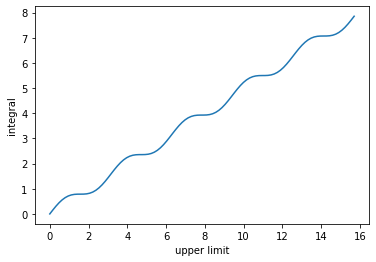

In [6]:
th_upper = pl.linspace(0, 5*pl.pi, 100)
results, errs = vec_intgrl1(th_upper)
pl.figure()
pl.plot(th_upper, results)
pl.xlabel('upper limit')
pl.ylabel('integral')
pl.show()

It is also possible to perform an integral that depends on another parameter in addition to the variable of integration. For example, you could calculate the integral
$$ \int_0^1 x^n dx,$$  
for different values of $n$.
The function **intgrnd2** is defined as a function of the integration varible $x$ (this must be the first argument) and the parameter $n$. The function **intgrl2** returns the integral as a funciton of the parameter (passed along using the **args** argument in the call to the **quad** function), with the limits of the integration fixed. After a vectorized function (called **vec_intgrl2**) is created, the values of the integral for the each parameter in a list can be found. This makes it easy to plot the integral vs. the parameter.

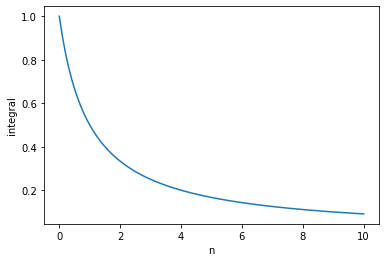

In [7]:
def intgrnd2(x, n):
    return x**n

def intgrl2(n): # make the parameter a variable
    return quad(intgrnd2, 0.0, 1.0, args=(n))

vec_intgrl2 = np.vectorize(intgrl2)

nlist = pl.linspace(0, 10, 100)
results, errs = vec_intgrl2(nlist)

pl.figure() 
pl.plot(nlist, results)
pl.xlabel('n')
pl.ylabel('integral')
pl.show()

## Exercise

The electric field a distance <i>z</i> above the center of a segment of length 2<i>L</i> with uniform
charge per length λ is vertical and its magnitude is
$$ E(z) = \frac{\lambda z}{4\pi\epsilon_0} \int_{-L}^L \frac{dx^\prime}{(x^{\prime 2}+z^2)^{3/2}}$$.
<ol type='a'>
<li> If you aren't give the values of all of the variables (<i>L</i> and λ in this case), it is best
to work with quantities that don't have units. Find an expression (integral) for the unitless quantity
<i>EL</i>/<i>k</i>λ, where <i>k</i> =1/4πε<sub>0</sub>.
<li> Plot <i>EL</i>/<i>k</i>λ vs. <i>Z</i>/<i>L</i> for values of <i>Z</i>/<i>L</i> from 0.5 to 10.0. (Have the computer solve the integral numerically!)
</ol>

## Additional Documentation

More information and examples are available at
https://docs.scipy.org/doc/scipy/tutorial/integrate.html